In [8]:
import os
import pandas as pd

book_loc = './Books'
#. current directory
os.listdir(book_loc)
#delete '.DS_Store' in atom

['German', 'English', 'Portuguese', 'French']

In [9]:
stats = pd.DataFrame(columns = ('language', 'author', 'title', 'u_num', 'value'))

print(stats)

Empty DataFrame
Columns: [language, author, title, u_num, value]
Index: []


In [17]:
from collections import Counter

book = 'This is, a test sentence, to keep things simple and managable, we are making the test short.'
book = book.lower()
#print(book)

def read_a_book(book_loc_path):
    with open(book_loc_path, 'r', encoding='utf-8') as file:
        book = file.read()
        book = book.replace('\n', '').replace('\t', '')
    return book

book = read_a_book('./Books/English/shakespeare/Hamlet.txt')


def count_words(book):
    skips = [',', '.']
    for punctuation in skips:
        book = book.replace(punctuation, '')
        #print(book)
    count = Counter(book.split(' '))
    #print(count)
    
    return count
    
def unique_words(count):
    u_num = len(count)
    val = count.values()
    #print(u_num, sum(val))

    return(u_num, sum(val))
   
#unique_words(count)
#count_words(book)



In [18]:
num = 1 
for language in os.listdir(book_loc):
    for author in os.listdir(book_loc + '/'+language):
        for title in os.listdir(book_loc + '/' + language + '/' + author):
            file = book_loc + '/' + language + '/' + author + '/' + title
            #print(file)
            #print(language)
            book = read_a_book(file)
            (u_num, value) = unique_words(count_words(book))
            
            stats.loc[num] = (language, author.capitalize(), title.replace('.txt', ''), u_num, value)       
            #print(stats)
            
            num += 1


,language,author,title,u_num,value
35,English,Shakespeare,Othello,6314,26590
36,English,Shakespeare,Richard III,6608,48315
37,English,Shakespeare,The Merchant of Venice,5199,20949
38,English,Shakespeare,A Midsummer Night's Dream,4578,16103
39,English,Shakespeare,Macbeth,5137,16874
40,English,Shakespeare,Hamlet,7300,28551
41,English,Shakespeare,Romeo and Juliet,6071,40776


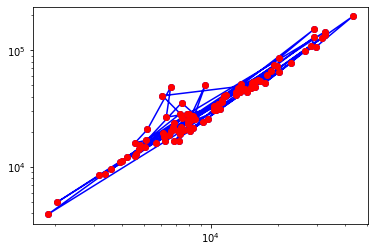

In [103]:
import matplotlib.pyplot as plt

plt.plot(stats.u_num, stats.value, 'bo-')
plt.loglog(stats.u_num, stats.value, 'ro')

stats[stats.language == 'English']

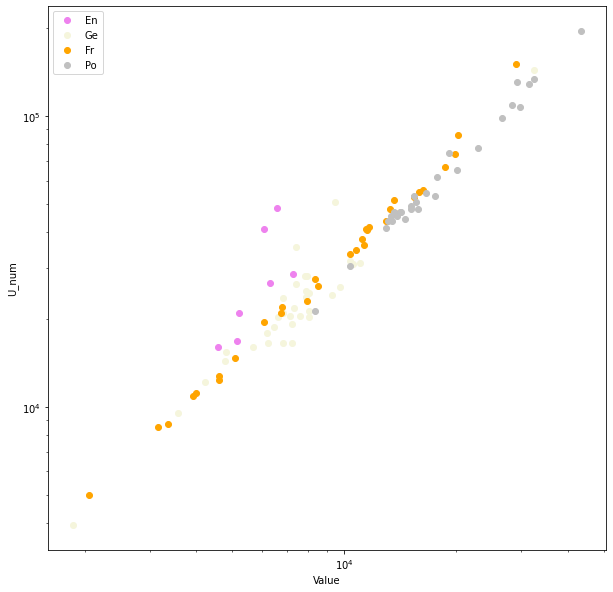

In [108]:
plt.figure(figsize = (10, 10))

enset = stats[stats.language == 'English']
plt.loglog(enset.u_num, enset.value, 'o', label = 'En', color = 'violet')

enset = stats[stats.language == 'German']
plt.loglog(enset.u_num, enset.value, 'o', label = 'Ge', color = 'beige')

enset = stats[stats.language == 'French']
plt.loglog(enset.u_num, enset.value, 'o', label = 'Fr', color = 'orange')

enset = stats[stats.language == 'Portuguese']
plt.loglog(enset.u_num, enset.value, 'o', label = 'Po', color = 'silver')

plt.legend()
plt.xlabel('Value')
plt.ylabel('U_num')
plt.savefig('book.pdf')
plt.show()